<a href="https://colab.research.google.com/github/vonlanot/connecticut-property-sales/blob/main/Connecticut_Real_Estate_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
import os

# Set a style for plots
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6) # Default figure size

# Download the dataset using kagglehub
# Ensure you have your Kaggle API key set up (usually in ~/.kaggle/kaggle.json)
# Or, if running locally, you might need to install kaggle (pip install kaggle)
# and then use the command line: kaggle datasets download joebeachcapital/house-prices-2001-2020
# For Colab, kagglehub simplifies this.

print("Downloading dataset from Kaggle...")
try:
    path = kagglehub.dataset_download("joebeachcapital/house-prices-2001-2020")
    print(f"Dataset downloaded to: {path}")

    # The dataset typically contains a CSV file. We need to find it within the downloaded path.
    # Let's assume the CSV file is named 'Real_Estate_Sales_2001-2020_GL.csv' or similar.
    # You might need to adjust the filename based on the actual downloaded content.

    # List files in the downloaded directory to find the CSV
    csv_files = [f for f in os.listdir(path) if f.endswith('.csv')]
    if csv_files:
        csv_file_name = csv_files[0] # Assuming there's one main CSV
        file_path = os.path.join(path, csv_file_name)
        print(f"Loading data from: {file_path}")
        df = pd.read_csv(file_path)
        print("Data loaded successfully!")
    else:
        print("No CSV files found in the downloaded directory.")
        df = None # Set df to None if no CSV found

except Exception as e:
    print(f"Error downloading or loading dataset: {e}")
    print("Please ensure your Kaggle API is correctly configured or try manual download and upload to Colab if issues persist.")
    df = None # Set df to None if loading fails

# Display the first few rows of the dataframe to understand its structure
if df is not None:
    print("\nFirst 5 rows of the dataset:")
    display(df.head())

    # Get a concise summary of the dataframe
    print("\nDataframe Info:")
    df.info()

    # Get descriptive statistics
    print("\nDescriptive Statistics:")
    display(df.describe())
else:
    print("\nDataFrame could not be loaded. Please check the download path and file name.")

Dataset downloaded to: /kaggle/input/house-prices-2001-2020
Loading data from: /kaggle/input/house-prices-2001-2020/Real_Estate_Sales_2001-2020_GL.csv


<ipython-input-25-8ad6b2788979>:34: DtypeWarning: Columns (8,9,10,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


Data loaded successfully!

First 5 rows of the dataset:


,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location
0,2020177,2020,04/14/2021,Ansonia,323 BEAVER ST,133000.0,248400.0,0.5354,Residential,Single Family,NaN,NaN,NaN,POINT (-73.06822 41.35014)
1,2020225,2020,05/26/2021,Ansonia,152 JACKSON ST,110500.0,239900.0,0.4606,Residential,Three Family,NaN,NaN,NaN,NaN
2,2020348,2020,09/13/2021,Ansonia,230 WAKELEE AVE,150500.0,325000.0,0.4630,Commercial,NaN,NaN,NaN,NaN,NaN
3,2020090,2020,12/14/2020,Ansonia,57 PLATT ST,127400.0,202500.0,0.6291,Residential,Two Family,NaN,NaN,NaN,NaN
4,200500,2020,09/07/2021,Avon,245 NEW ROAD,217640.0,400000.0,0.5441,Residential,Single Family,NaN,NaN,NaN,NaN



Dataframe Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 997213 entries, 0 to 997212
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Serial Number     997213 non-null  int64  
 1   List Year         997213 non-null  int64  
 2   Date Recorded     997211 non-null  object 
 3   Town              997213 non-null  object 
 4   Address           997162 non-null  object 
 5   Assessed Value    997213 non-null  float64
 6   Sale Amount       997213 non-null  float64
 7   Sales Ratio       997213 non-null  float64
 8   Property Type     614767 non-null  object 
 9   Residential Type  608904 non-null  object 
 10  Non Use Code      289681 non-null  object 
 11  Assessor Remarks  149864 non-null  object 
 12  OPM remarks       9934 non-null    object 
 13  Location          197697 non-null  object 
dtypes: float64(3), int64(2), object(9)
memory usage: 106.5+ MB

Descriptive Statistics:


,Serial Number,List Year,Assessed Value,Sale Amount,Sales Ratio
count,9.972130e+05,997213.000000,9.972130e+05,9.972130e+05,9.972130e+05
mean,4.311864e+05,2010.189829,2.791437e+05,3.911512e+05,1.044637e+01
std,6.549219e+06,6.237877,1.670610e+06,5.347270e+06,1.890192e+03
min,0.000000e+00,2001.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.044400e+04,2004.000000,8.760000e+04,1.400000e+05,4.867000e-01
50%,7.030300e+04,2010.000000,1.383900e+05,2.250000e+05,6.246000e-01
75%,1.518780e+05,2016.000000,2.255600e+05,3.650000e+05,7.852761e-01
max,2.000500e+09,2020.000000,8.815100e+08,5.000000e+09,1.226420e+06


In [26]:
# Check for uniqueness of 'Serial Number'
is_serial_unique = df['Serial Number'].nunique() == len(df)
print(f"Are all 'Serial Number' entries unique? {is_serial_unique}")

# If not unique, find out how many duplicates there are
if not is_serial_unique:
    duplicate_serial_numbers = df['Serial Number'].duplicated().sum()
    print(f"Number of duplicate 'Serial Number' entries: {duplicate_serial_numbers}")

    # Optionally, display some of the duplicate serial numbers
    print("\nSample of duplicate 'Serial Number' entries (first 10):")
    display(df[df['Serial Number'].duplicated(keep=False)].sort_values('Serial Number').head(10))

Are all 'Serial Number' entries unique? False
Number of duplicate 'Serial Number' entries: 913676

Sample of duplicate 'Serial Number' entries (first 10):


,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location
574147,1102,2011,10/28/2011,Ansonia,10 MENNA RD,217900.0,275000.0,0.792364,Single Family,Single Family,NaN,NaN,NaN,POINT (-73.0435 41.3401)
600300,1102,2011,10/03/2011,Southbury,50 RIVERHILL RD,207490.0,218500.0,0.949611,Single Family,Single Family,NaN,NaN,NaN,NaN
809859,1609,2016,09/05/2017,East Hampton,46 MEEKS POINT RD,417190.0,614000.0,0.679463,Single Family,Single Family,NaN,NaN,NaN,NaN
826015,1609,2016,10/28/2016,Wethersfield,101 SHARON LN,77800.0,99000.0,0.785859,Condo,Condo,NaN,NaN,NaN,NaN
981051,1901,2019,10/28/2019,Scotland,94 PINCH ST,159200.0,260000.0,0.612300,Single Family,Single Family,NaN,CAPE BLT 2015.,NaN,POINT (-72.08844 41.70455)
935387,1901,2019,10/04/2019,Ashford,41 CIRCLE DR,109500.0,155000.0,0.706500,Single Family,Single Family,11 - Court Order,BANK SALE,NaN,NaN
978237,1902,2019,10/08/2019,Ashford,3 SHORE FRONT DR,99900.0,178000.0,0.561200,Single Family,Single Family,NaN,WATERFRONT LAKE CHAFEE. PREVIOUS SALE 4 MONTH...,NaN,NaN
975563,1902,2019,11/05/2019,Scotland,560 KEMP,115100.0,160000.0,0.719400,Single Family,Single Family,NaN,RAISED RANCH BLT 1982,NaN,POINT (-72.11798 41.72551)
976787,1903,2019,11/12/2019,Scotland,49 HUNTINGTON RD,217500.0,315000.0,0.690500,Single Family,Single Family,NaN,COLONIAL BLT 1989. ON RT 14.,NaN,POINT (-72.08684 41.69837)
934592,1903,2019,10/18/2019,Ashford,42 WESTFORD D,78300.0,143000.0,0.547600,Single Family,Single Family,NaN,"LAKE CHAFEE AREA, 2 BR",NaN,NaN


In [27]:
import pandas as pd
import numpy as np

print("--- Inspecting 'Date Recorded' column (Before Cleaning - Full Row Context) ---")

# 1. Check current data type and non-null count
print(f"Current data type of 'Date Recorded': {df['Date Recorded'].dtype}")
print(f"Current non-null count for 'Date Recorded': {df['Date Recorded'].count()}")
print(f"Total rows in DataFrame: {len(df)}")

# 2. Identify and display rows with explicit missing values (NaN/None) in 'Date Recorded'
print("\n--- Rows where 'Date Recorded' is explicitly missing (NaN/None) ---")
# Use .isna() to find NaN/None values for object type columns
missing_dates_rows = df[df['Date Recorded'].isna()]

if not missing_dates_rows.empty:
    print(f"Number of rows with missing 'Date Recorded': {len(missing_dates_rows)}")
    # Display ALL columns for the missing rows
    display(missing_dates_rows)
else:
    print("No explicit missing (NaN/None) values found in 'Date Recorded' column.")

# 3. Inspect a sample of non-missing date formats
# This helps us understand the common patterns and potentially spot immediate string-based errors.
print("\n--- Sample of non-missing 'Date Recorded' values (top 10 most frequent) ---")
if df['Date Recorded'].count() > 0: # Ensure there are non-missing values to sample
    # Convert to string first to ensure consistency for display
    print(df['Date Recorded'].astype(str).value_counts().head(10))
    print("\n--- A few random samples of 'Date Recorded' values ---")
    display(df['Date Recorded'].sample(10, random_state=42).tolist()) # Use a random_state for reproducibility
else:
    print("No non-missing 'Date Recorded' values to sample.")

--- Inspecting 'Date Recorded' column (Before Cleaning - Full Row Context) ---
Current data type of 'Date Recorded': object
Current non-null count for 'Date Recorded': 997211
Total rows in DataFrame: 997213

--- Rows where 'Date Recorded' is explicitly missing (NaN/None) ---
Number of rows with missing 'Date Recorded': 2


,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location
177987,20280,2002,NaN,Orange,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
179479,0,2002,NaN,Orange,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN



--- Sample of non-missing 'Date Recorded' values (top 10 most frequent) ---
Date Recorded
07/01/2005    877
08/01/2005    859
07/01/2004    840
06/30/2005    828
09/30/2005    781
07/01/2002    779
10/01/2004    777
11/01/2004    777
05/02/2005    732
08/02/2004    727
Name: count, dtype: int64

--- A few random samples of 'Date Recorded' values ---


['12/16/2019',
 '03/28/2012',
 '05/16/2016',
 '06/14/2004',
 '01/22/2014',
 '01/07/2014',
 '04/16/2015',
 '09/16/2013',
 '07/01/2016',
 '05/22/2017']

In [28]:
import pandas as pd
import numpy as np

print("--- Cleaning 'Date Recorded' column ---")
print(f"Initial data type of 'Date Recorded': {df['Date Recorded'].dtype}")
print(f"Initial non-null count for 'Date Recorded': {df['Date Recorded'].count()}")

# Convert to datetime, coercing errors will turn invalid dates into NaT (Not a Time)
# As we've inspected, the primary issue is explicit NaN. This step will turn those into NaT.
df['Date Recorded'] = pd.to_datetime(df['Date Recorded'], errors='coerce')

# --- Check for and Handle NaT values ---
nat_dates_count = df['Date Recorded'].isna().sum()

if nat_dates_count > 0:
    print(f"\nFound {nat_dates_count} rows with invalid/missing 'Date Recorded' (now NaT).")
    print("These rows are effectively empty for our analysis and will be dropped.")

    initial_rows = len(df)
    df.dropna(subset=['Date Recorded'], inplace=True)
    rows_dropped = initial_rows - len(df)
    print(f"Dropped {rows_dropped} rows with invalid 'Date Recorded'.")
    print(f"New DataFrame size: {len(df)} rows.")
else:
    print("\nAll 'Date Recorded' values converted successfully with no NaT values generated.")

# --- Verify changes ---
print(f"\nFinal data type of 'Date Recorded': {df['Date Recorded'].dtype}")
print(f"Final non-null count for 'Date Recorded': {df['Date Recorded'].count()}")
print(f"Earliest date recorded: {df['Date Recorded'].min()}")
print(f"Latest date recorded: {df['Date Recorded'].max()}")

print("\n--- Overall DataFrame Info (after 'Date Recorded' cleaning) ---")
df.info()

--- Cleaning 'Date Recorded' column ---
Initial data type of 'Date Recorded': object
Initial non-null count for 'Date Recorded': 997211

Found 2 rows with invalid/missing 'Date Recorded' (now NaT).
These rows are effectively empty for our analysis and will be dropped.
Dropped 2 rows with invalid 'Date Recorded'.
New DataFrame size: 997211 rows.

Final data type of 'Date Recorded': datetime64[ns]
Final non-null count for 'Date Recorded': 997211
Earliest date recorded: 1999-04-05 00:00:00
Latest date recorded: 2021-09-30 00:00:00

--- Overall DataFrame Info (after 'Date Recorded' cleaning) ---
<class 'pandas.core.frame.DataFrame'>
Index: 997211 entries, 0 to 997212
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Serial Number     997211 non-null  int64         
 1   List Year         997211 non-null  int64         
 2   Date Recorded     997211 non-null  datetime64[ns]
 3   Town           

--- Inspecting 'Sale Amount' Column (Before Cleaning) ---

--- Descriptive Statistics for 'Sale Amount' ---
count    9.972110e+05
mean     3.911520e+05
std      5.347276e+06
min      0.000000e+00
25%      1.400000e+05
50%      2.250000e+05
75%      3.650000e+05
max      5.000000e+09
Name: Sale Amount, dtype: float64


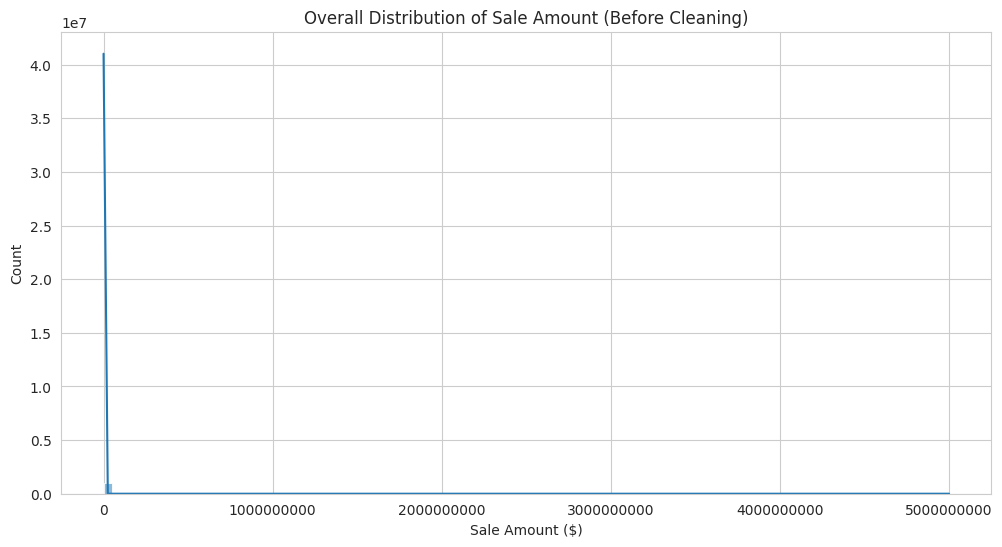


--- Distribution of Sale Amount (Under $5,000,000) ---


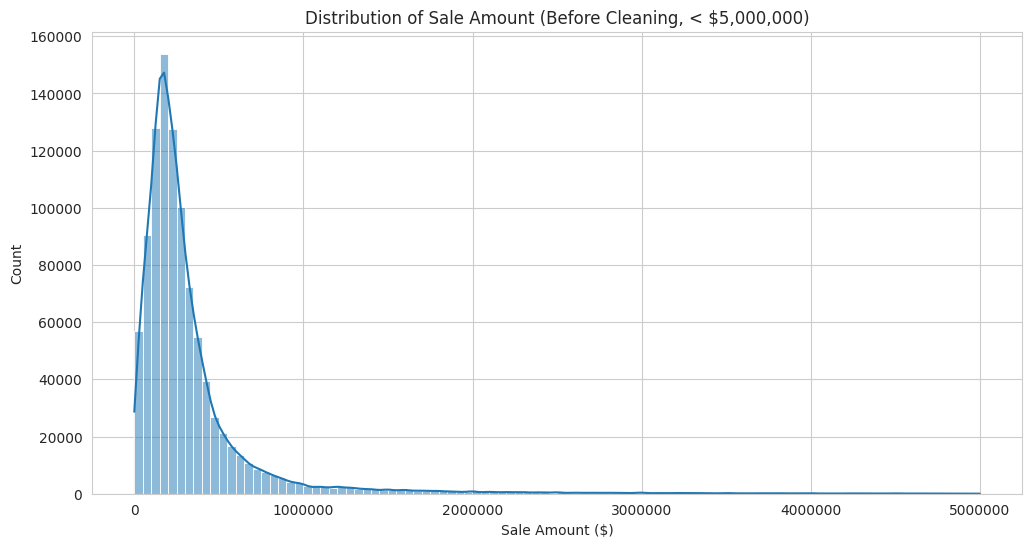


--- Inspecting Rows with 'Sale Amount' <= 0 ---
Number of rows with 'Sale Amount' <= 0: 1808
Full details for the first 5 rows with 'Sale Amount' <= 0:


,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location
310,10703,2001,2002-03-27,Hartford,46-48 DEERFIELD AVE,58030.0,0.0,0.0,NaN,NaN,11,NaN,NaN,NaN
3406,10768,2001,2002-04-11,Hartford,60 BURLINGTON ST,54530.0,0.0,0.0,NaN,NaN,15,NaN,NaN,NaN
28277,10445,2001,2002-01-16,Hartford,486 CORNWALL ST,51870.0,0.0,0.0,NaN,NaN,4,NaN,NaN,NaN
49511,10179,2001,2002-02-12,Guilford,GULL LN,55580.0,0.0,0.0,NaN,NaN,3,NaN,NaN,NaN
66889,10020,2001,2001-11-07,Bethany,168 BEAR HILL RD,148010.0,0.0,0.0,NaN,NaN,2,NaN,NaN,NaN



--- Inspecting Rows with Extremely High 'Sale Amount' ---
Percentiles of 'Sale Amount':
0.99000    2.850000e+06
0.99900    1.365000e+07
0.99990    7.124313e+07
0.99999    3.209302e+08
1.00000    5.000000e+09
Name: Sale Amount, dtype: float64

Number of rows with 'Sale Amount' > $100,000,000: 48
Full details for the first 5 rows with 'Sale Amount' > $100,000,000:


,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location
28143,202299,2020,2021-05-17,Norwalk,26 BELDEN AVE,53894410.0,1.030000e+08,0.523200,Apartments,NaN,NaN,1-36-50-0,NaN,POINT (-73.41685 41.1181)
30649,2001077,2020,2021-03-01,Stamford,101 WASHINGTON BLVD,87888480.0,1.050000e+08,0.837000,Commercial,NaN,NaN,NaN,NaN,POINT (-73.54201 41.04037)
39660,2002096,2020,2021-07-12,Stamford,180 200 BROAD STREET,87850000.0,1.540000e+08,0.570400,Commercial,NaN,NaN,NaN,NaN,NaN
59764,20200091,2020,2021-08-19,Willington,456 TOLLAND TPKE,2238530.0,5.000000e+09,0.000448,Apartments,NaN,25 - Other,APARTMENTS-COMMERICAL,INCORRECT SALE PRICE,NaN
60822,20200078,2020,2021-07-06,Willington,224 RIVER ROAD,223070.0,3.187900e+08,0.000700,Residential,Single Family,25 - Other,COLONIAL,INCORRECT SALE PRICE - NO MLS,POINT (-72.30341 41.86603)


In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set a style for plots and default figure size
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

print("--- Inspecting 'Sale Amount' Column (Before Cleaning) ---")

# 1. Descriptive Statistics
print("\n--- Descriptive Statistics for 'Sale Amount' ---")
print(df['Sale Amount'].describe())

# 2. Visualize Overall Distribution
# This plot will likely be heavily skewed due to extreme outliers
plt.figure(figsize=(12, 6))
sns.histplot(df['Sale Amount'], bins=100, kde=True) # Increased bins for more detail
plt.title('Overall Distribution of Sale Amount (Before Cleaning)')
plt.xlabel('Sale Amount ($)')
plt.ylabel('Count')
plt.ticklabel_format(style='plain', axis='x') # Prevent scientific notation on x-axis
plt.show()

# 3. Visualize Distribution for the Majority of Sales (e.g., values under a certain threshold)
# The overall histogram is hard to read because of the outliers.
# Let's create a focused plot for values that are likely to represent typical sales.
# A common approach is to pick a reasonable upper bound, e.g., 99.9th percentile or a round number.
# Let's initially look at sales under, say, $5,000,000 as a reasonable cutoff to see the bulk.
sale_amount_upper_bound_for_hist = 5_000_000 # 5 Million Dollars

print(f"\n--- Distribution of Sale Amount (Under ${sale_amount_upper_bound_for_hist:,.0f}) ---")
plt.figure(figsize=(12, 6))
sns.histplot(df[df['Sale Amount'] < sale_amount_upper_bound_for_hist]['Sale Amount'], bins=100, kde=True)
plt.title(f'Distribution of Sale Amount (Before Cleaning, < ${sale_amount_upper_bound_for_hist:,.0f})')
plt.xlabel('Sale Amount ($)')
plt.ylabel('Count')
plt.ticklabel_format(style='plain', axis='x')
plt.show()


# 4. Inspect rows with 'Sale Amount' <= 0
print("\n--- Inspecting Rows with 'Sale Amount' <= 0 ---")
zero_or_negative_sales = df[df['Sale Amount'] <= 0]
print(f"Number of rows with 'Sale Amount' <= 0: {len(zero_or_negative_sales)}")
if not zero_or_negative_sales.empty:
    print("Full details for the first 5 rows with 'Sale Amount' <= 0:")
    display(zero_or_negative_sales.head())
else:
    print("No rows found with 'Sale Amount' <= 0.")

# 5. Inspect rows with extremely high 'Sale Amount' values
print("\n--- Inspecting Rows with Extremely High 'Sale Amount' ---")
# Let's look at the top few percentiles to see the actual values.
print("Percentiles of 'Sale Amount':")
print(df['Sale Amount'].quantile([0.99, 0.999, 0.9999, 0.99999, 1.0]))

# Define a high threshold to inspect extreme outliers (e.g., above $100 Million)
# We're just inspecting here, not yet deciding on a final threshold for dropping.
high_outlier_inspection_threshold = 100_000_000 # 100 Million Dollars

extreme_high_sales = df[df['Sale Amount'] > high_outlier_inspection_threshold]
print(f"\nNumber of rows with 'Sale Amount' > ${high_outlier_inspection_threshold:,.0f}: {len(extreme_high_sales)}")
if not extreme_high_sales.empty:
    print(f"Full details for the first 5 rows with 'Sale Amount' > ${high_outlier_inspection_threshold:,.0f}:")
    display(extreme_high_sales.head())
else:
    print(f"No rows found with 'Sale Amount' > ${high_outlier_inspection_threshold:,.0f}.")

--- Alternative Visualizations for 'Sale Amount' (Before Cleaning) ---


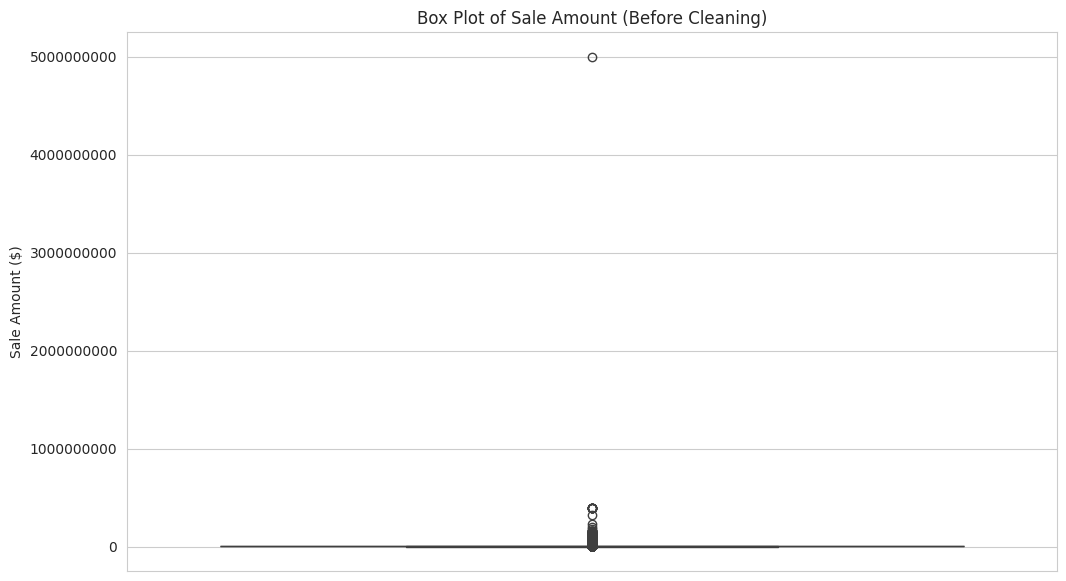

Interpretation: The box plot clearly shows the majority of data points clustered at the very low end, while individual points represent the extreme outliers, some extending to billions.


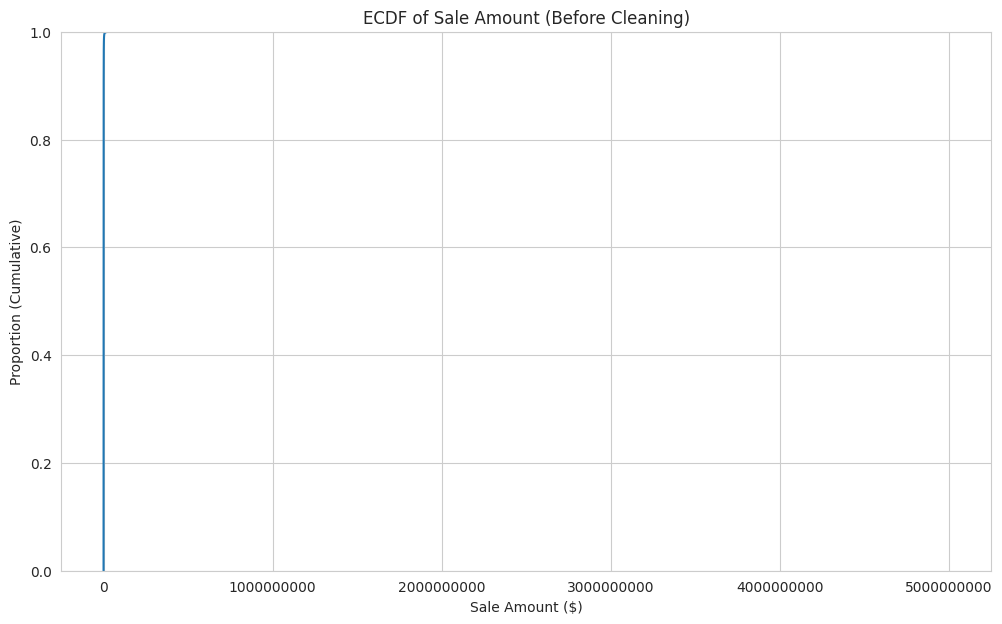

Interpretation: The ECDF plot's steep rise near zero indicates that a very high proportion of sales are at lower values. The very long, flat tail confirms the presence of extreme, sparse high-value outliers.


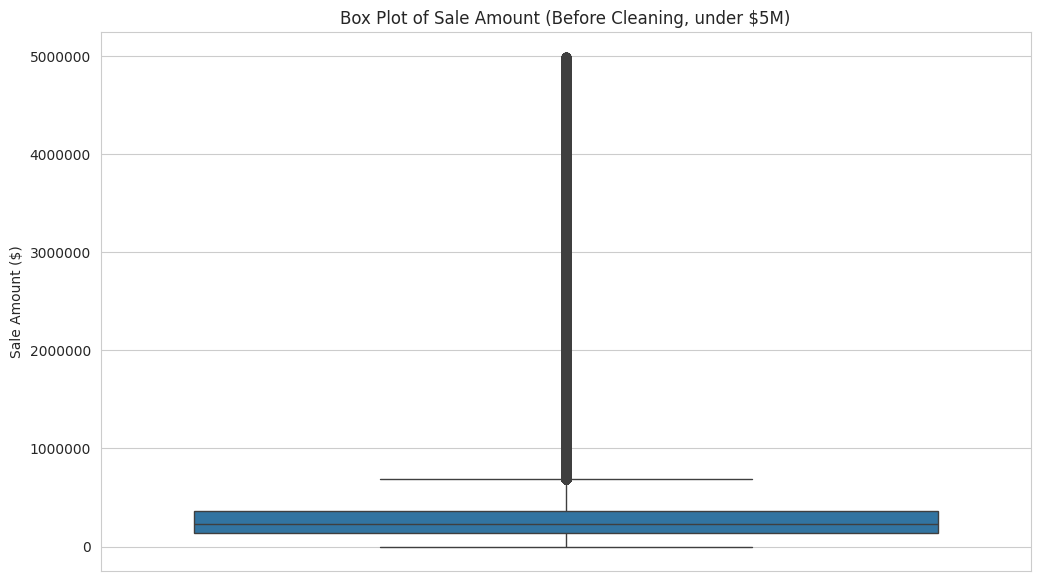

Interpretation (Zoomed Box Plot): This helps visualize the actual distribution of the bulk of the data without being stretched by extreme outliers.


In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np # For potential use with ECDF or other functions

# Ensure plotting style and figure size are set
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

print("--- Alternative Visualizations for 'Sale Amount' (Before Cleaning) ---")

# 1. Box Plot for 'Sale Amount'
# This will clearly show the median, quartiles, and individual outliers
plt.figure(figsize=(12, 7))
sns.boxplot(y=df['Sale Amount']) # Use 'y' for a vertical box plot
plt.title('Box Plot of Sale Amount (Before Cleaning)')
plt.ylabel('Sale Amount ($)')
plt.ticklabel_format(style='plain', axis='y') # Prevent scientific notation on y-axis
plt.show()
print("Interpretation: The box plot clearly shows the majority of data points clustered at the very low end, while individual points represent the extreme outliers, some extending to billions.")

# 2. ECDF Plot (Empirical Cumulative Distribution Function) for 'Sale Amount'
# This shows the proportion of sales below a given amount.
# It's great for seeing how rapidly the data accumulates at lower values.
plt.figure(figsize=(12, 7))
sns.ecdfplot(data=df, x='Sale Amount')
plt.title('ECDF of Sale Amount (Before Cleaning)')
plt.xlabel('Sale Amount ($)')
plt.ylabel('Proportion (Cumulative)')
plt.ticklabel_format(style='plain', axis='x') # Prevent scientific notation on x-axis
# You'll notice almost all the curve is at the very beginning of the x-axis, then flattens out.
plt.show()
print("Interpretation: The ECDF plot's steep rise near zero indicates that a very high proportion of sales are at lower values. The very long, flat tail confirms the presence of extreme, sparse high-value outliers.")

# Optional: Zoomed-in Box Plot or ECDF for better detail on the main cluster
# Similar to the histogram, sometimes zooming in helps.
# For example, to see the box plot for values under $5,000,000
plt.figure(figsize=(12, 7))
sns.boxplot(y=df[df['Sale Amount'] < 5_000_000]['Sale Amount'])
plt.title('Box Plot of Sale Amount (Before Cleaning, under $5M)')
plt.ylabel('Sale Amount ($)')
plt.ticklabel_format(style='plain', axis='y')
plt.show()
print("Interpretation (Zoomed Box Plot): This helps visualize the actual distribution of the bulk of the data without being stretched by extreme outliers.")

In [31]:
import pandas as pd

print("--- Verifying 'Sale Amount' == 0 Entries ---")

# Filter for rows where 'Sale Amount' is exactly 0
zero_sale_amount_entries = df[df['Sale Amount'] == 0]

# Count the number of such entries
num_zero_sale_amount = len(zero_sale_amount_entries)
print(f"Number of rows with 'Sale Amount' exactly 0: {num_zero_sale_amount}")

# Display a sample of these rows (all columns) to understand their context
if num_zero_sale_amount > 0:
    print("\n--- Sample of rows with 'Sale Amount' == 0 (first 10, all columns) ---")
    display(zero_sale_amount_entries.head(10))
    # It's good to also know the total percentage this represents
    total_rows = len(df)
    percentage_zeros = (num_zero_sale_amount / total_rows) * 100
    print(f"\nThese constitute {percentage_zeros:.2f}% of the current DataFrame.")
else:
    print("No rows found with 'Sale Amount' exactly 0.")

--- Verifying 'Sale Amount' == 0 Entries ---
Number of rows with 'Sale Amount' exactly 0: 1808

--- Sample of rows with 'Sale Amount' == 0 (first 10, all columns) ---


,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location
310,10703,2001,2002-03-27,Hartford,46-48 DEERFIELD AVE,58030.0,0.0,0.0,NaN,NaN,11,NaN,NaN,NaN
3406,10768,2001,2002-04-11,Hartford,60 BURLINGTON ST,54530.0,0.0,0.0,NaN,NaN,15,NaN,NaN,NaN
28277,10445,2001,2002-01-16,Hartford,486 CORNWALL ST,51870.0,0.0,0.0,NaN,NaN,4,NaN,NaN,NaN
49511,10179,2001,2002-02-12,Guilford,GULL LN,55580.0,0.0,0.0,NaN,NaN,3,NaN,NaN,NaN
66889,10020,2001,2001-11-07,Bethany,168 BEAR HILL RD,148010.0,0.0,0.0,NaN,NaN,2,NaN,NaN,NaN
66916,10085,2001,2002-04-17,Bethany,17 CRESTWOOD RD,126090.0,0.0,0.0,NaN,NaN,2,NaN,NaN,NaN
66918,19007,2001,2001-11-21,Bethany,74 FALLS RD,135520.0,0.0,0.0,NaN,NaN,2,NaN,NaN,NaN
66932,10654,2001,2002-02-14,Stratford,6905 MAIN ST,0.0,0.0,0.0,NaN,NaN,19,NaN,NaN,NaN
66934,11704,2001,2002-08-23,Norwalk,0 STRATHMORE LN,6580.0,0.0,0.0,NaN,NaN,25,NaN,NaN,NaN
66935,10393,2001,2001-12-19,Stratford,34 TERRY PL,111570.0,0.0,0.0,NaN,NaN,8,NaN,NaN,NaN



These constitute 0.18% of the current DataFrame.


In [32]:
import pandas as pd
import numpy as np

print("--- Grouping 'Sale Amount' into 10 Equal-Width Price Ranges ---")

# Define the number of bins
num_bins = 10

# Create equal-width bins using pd.cut
# We'll use the min and max from your descriptive statistics.
# pd.cut automatically determines bin edges if only bins=integer is provided.
df['Sale_Amount_Bin_Equal_Width'] = pd.cut(df['Sale Amount'], bins=num_bins, right=True)

# Display the value counts for these bins
print("\nValue Counts for 10 Equal-Width Sale Amount Bins:")
print(df['Sale_Amount_Bin_Equal_Width'].value_counts().sort_index())

# Display the proportion of data in each bin
print("\nProportion of Data in 10 Equal-Width Sale Amount Bins:")
print(df['Sale_Amount_Bin_Equal_Width'].value_counts(normalize=True).sort_index())

# Let's inspect the actual bin edges generated
print("\nGenerated Bin Edges:")
# To get the bin edges, we can apply pd.cut on the Series and then inspect the categories
bins_info = pd.cut(df['Sale Amount'], bins=num_bins, right=True, retbins=True)
print(bins_info[1]) # The second element of the tuple is the bin edges

--- Grouping 'Sale Amount' into 10 Equal-Width Price Ranges ---

Value Counts for 10 Equal-Width Sale Amount Bins:
Sale_Amount_Bin_Equal_Width
(-5000000.0, 500000000.0]       997210
(500000000.0, 1000000000.0]          0
(1000000000.0, 1500000000.0]         0
(1500000000.0, 2000000000.0]         0
(2000000000.0, 2500000000.0]         0
(2500000000.0, 3000000000.0]         0
(3000000000.0, 3500000000.0]         0
(3500000000.0, 4000000000.0]         0
(4000000000.0, 4500000000.0]         0
(4500000000.0, 5000000000.0]         1
Name: count, dtype: int64

Proportion of Data in 10 Equal-Width Sale Amount Bins:
Sale_Amount_Bin_Equal_Width
(-5000000.0, 500000000.0]       0.999999
(500000000.0, 1000000000.0]     0.000000
(1000000000.0, 1500000000.0]    0.000000
(1500000000.0, 2000000000.0]    0.000000
(2000000000.0, 2500000000.0]    0.000000
(2500000000.0, 3000000000.0]    0.000000
(3000000000.0, 3500000000.0]    0.000000
(3500000000.0, 4000000000.0]    0.000000
(4000000000.0, 4500000000.0] 

--- Inspecting 'Sale Amount' with Custom Quantile-Segmented Bins ---

Generated 20 custom bins based on your quartile-segmentation request:
[0.000000e+00 2.800000e+04 5.600000e+04 8.400000e+04 1.120000e+05
 1.400000e+05 1.570000e+05 1.740000e+05 1.910000e+05 2.080000e+05
 2.250000e+05 2.530000e+05 2.810000e+05 3.090000e+05 3.370000e+05
 3.650000e+05 1.000292e+09 2.000219e+09 3.000146e+09 4.000073e+09
 5.000000e+09]

Value Counts for Custom Sale Amount Bins:
Sale_Amount_Custom_Bins
(-0.001, 28000.0]                29880
(28000.0, 56000.0]               39302
(56000.0, 84000.0]               49196
(84000.0, 112000.0]              57121
(112000.0, 140000.0]             77615
(140000.0, 157000.0]             49151
(157000.0, 174000.0]             51756
(174000.0, 191000.0]             55932
(191000.0, 208000.0]             42739
(208000.0, 225000.0]             48213
(225000.0, 253000.0]             67398
(253000.0, 281000.0]             58706
(281000.0, 309000.0]             45649
(309000

<ipython-input-33-f8f526c0a3a9>:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Sale_Amount_Custom_Bins', data=df, order=df['Sale_Amount_Custom_Bins'].value_counts().sort_index().index, palette='viridis')


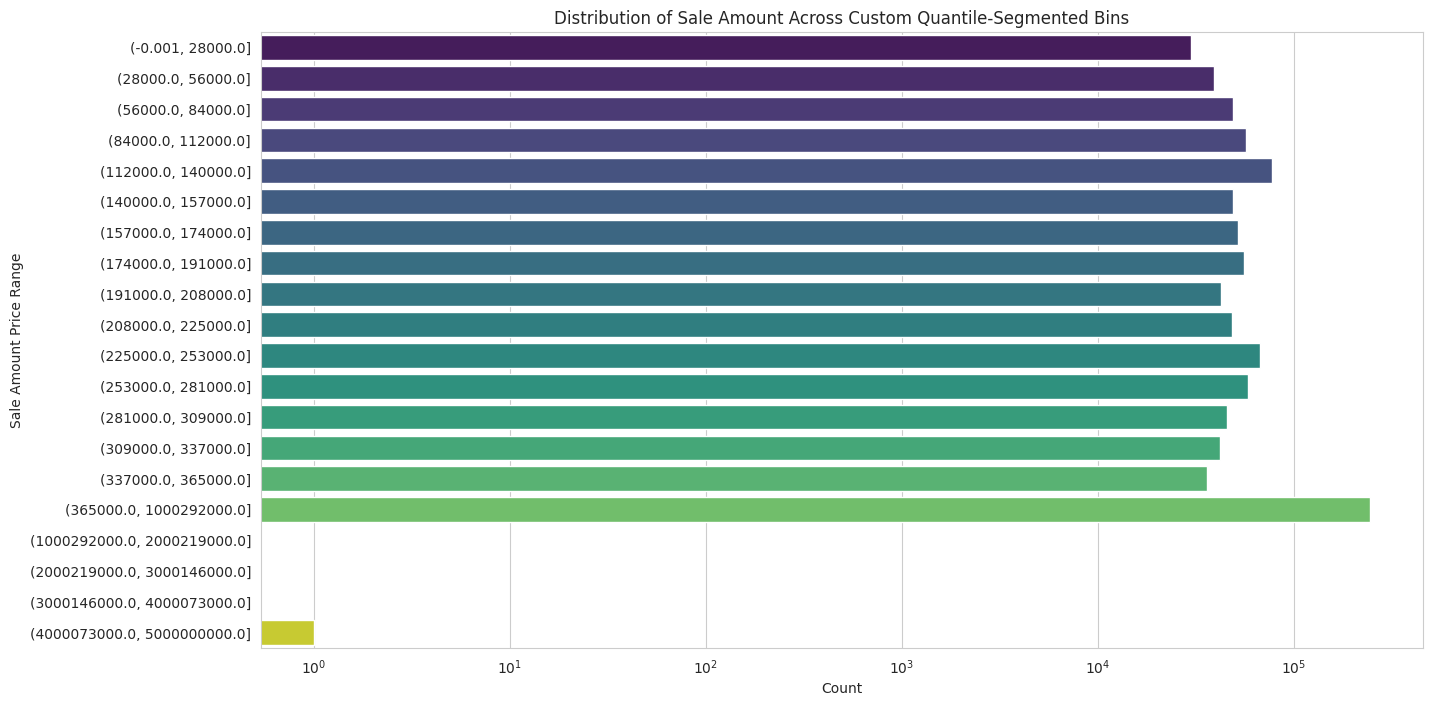


Observation: This binning strategy allows for a more detailed look at the distribution within each quartile, especially at the lower price points where most sales occur.
The large count in the highest bin reflects the long tail of the distribution, including the 5 billion outlier.


In [33]:
import pandas as pd
import numpy as np

print("--- Inspecting 'Sale Amount' with Custom Quantile-Segmented Bins ---")

# Define the key percentiles provided by the user
q0 = 0.0          # Minimum
q25 = 140000.0    # 25th percentile
q50 = 225000.0    # 50th percentile (Median)
q75 = 365000.0    # 75th percentile
q100 = 5000000000.0 # Maximum

# Number of bins desired for each segment
bins_per_segment = 5

# --- Calculate custom bin edges for each segment ---
# Segment 1: Min to Q1 (0 to 140,000)
# np.linspace creates evenly spaced numbers over a specified interval.
# We need bins_per_segment + 1 edges to create bins_per_segment bins.
bins_s1 = np.linspace(q0, q25, bins_per_segment + 1)

# Segment 2: Q1 to Q2 (140,000 to 225,000)
bins_s2 = np.linspace(q25, q50, bins_per_segment + 1)

# Segment 3: Q2 to Q3 (225,000 to 365,000)
bins_s3 = np.linspace(q50, q75, bins_per_segment + 1)

# Segment 4: Q3 to Max (365,000 to 5,000,000,000)
bins_s4 = np.linspace(q75, q100, bins_per_segment + 1)

# Combine all bin edges, ensuring no duplicates and maintaining order
# Using np.unique and then sorting handles potential overlaps at segment boundaries.
custom_bins = np.unique(np.concatenate([bins_s1, bins_s2, bins_s3, bins_s4]))

# Ensure the very minimum (0.0) is included as the left-most edge if it's not already
# np.linspace with min=0.0 will naturally include it.
# pd.cut with `include_lowest=True` will ensure values equal to the left-most bin edge are included.

print(f"\nGenerated {len(custom_bins) - 1} custom bins based on your quartile-segmentation request:")
print(custom_bins)

# Apply the custom binning to 'Sale Amount'
# `include_lowest=True` ensures that the minimum value (0.0) is included in the first bin.
df['Sale_Amount_Custom_Bins'] = pd.cut(df['Sale Amount'], bins=custom_bins, include_lowest=True, right=True)

# Display the value counts for these custom bins
print("\nValue Counts for Custom Sale Amount Bins:")
# Sort by index to see the bins in ascending order
print(df['Sale_Amount_Custom_Bins'].value_counts().sort_index())

# Display the proportion of data in each bin
print("\nProportion of Data in Custom Sale Amount Bins:")
print(df['Sale_Amount_Custom_Bins'].value_counts(normalize=True).sort_index())

# You can also visualize this distribution
plt.figure(figsize=(15, 8))
sns.countplot(y='Sale_Amount_Custom_Bins', data=df, order=df['Sale_Amount_Custom_Bins'].value_counts().sort_index().index, palette='viridis')
plt.title('Distribution of Sale Amount Across Custom Quantile-Segmented Bins')
plt.xlabel('Count')
plt.ylabel('Sale Amount Price Range')
plt.xscale('log') # Use log scale for count if highly skewed to see smaller bins
plt.show()

print("\nObservation: This binning strategy allows for a more detailed look at the distribution within each quartile, especially at the lower price points where most sales occur.")
print("The large count in the highest bin reflects the long tail of the distribution, including the 5 billion outlier.")

In [34]:
print("\n--- Inspecting the row(s) with 'Sale Amount' == 5,000,000,000 ---")

# Filter the DataFrame to find rows where 'Sale Amount' is exactly 5,000,000,000
five_billion_sale = df[df['Sale Amount'] == 5_000_000_000]

if not five_billion_sale.empty:
    print(f"Found {len(five_billion_sale)} row(s) with a Sale Amount of 5 billion:")
    display(five_billion_sale)
else:
    print("No row found with a Sale Amount of exactly 5,000,000,000.")


--- Inspecting the row(s) with 'Sale Amount' == 5,000,000,000 ---
Found 1 row(s) with a Sale Amount of 5 billion:


,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location,Sale_Amount_Bin_Equal_Width,Sale_Amount_Custom_Bins
59764,20200091,2020,2021-08-19,Willington,456 TOLLAND TPKE,2238530.0,5.000000e+09,0.000448,Apartments,NaN,25 - Other,APARTMENTS-COMMERICAL,INCORRECT SALE PRICE,NaN,"(4500000000.0, 5000000000.0]","(4000073000.0, 5000000000.0]"


In [35]:
import pandas as pd
import numpy as np # Ensure numpy is imported if not already

print("--- Dropping the 5 Billion Sale Amount Row ---")

# Record the initial number of rows
initial_rows = len(df)
print(f"Initial number of rows in DataFrame: {initial_rows}")

# Drop rows where 'Sale Amount' is exactly 5,000,000,000
# We use .copy() to ensure we're working on a new DataFrame object,
# which can help prevent SettingWithCopyWarning in future operations.
df = df[df['Sale Amount'] != 5_000_000_000].copy()

# Record the number of rows after dropping
rows_after_drop = len(df)
rows_dropped = initial_rows - rows_after_drop

print(f"Number of rows dropped: {rows_dropped}")
print(f"New number of rows in DataFrame: {rows_after_drop}")

# Verify that the maximum 'Sale Amount' is no longer 5 billion
print("\n--- Verifying new maximum 'Sale Amount' ---")
print(df['Sale Amount'].describe())

# A quick check to confirm the row is gone (should return empty DataFrame)
print("\n--- Re-inspecting for 5 Billion Sale Amount (should be empty) ---")
display(df[df['Sale Amount'] == 5_000_000_000])

--- Dropping the 5 Billion Sale Amount Row ---
Initial number of rows in DataFrame: 997211
Number of rows dropped: 1
New number of rows in DataFrame: 997210

--- Verifying new maximum 'Sale Amount' ---
count    9.972100e+05
mean     3.861384e+05
std      1.878114e+06
min      0.000000e+00
25%      1.400000e+05
50%      2.250000e+05
75%      3.650000e+05
max      3.955000e+08
Name: Sale Amount, dtype: float64

--- Re-inspecting for 5 Billion Sale Amount (should be empty) ---


,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location,Sale_Amount_Bin_Equal_Width,Sale_Amount_Custom_Bins


In [36]:
import pandas as pd
import numpy as np

print("--- Inspecting 'OPM remarks' Column ---")

# 1. Check data type and non-null count
print(f"Current data type of 'OPM remarks': {df['OPM remarks'].dtype}")
print(f"Non-null count for 'OPM remarks': {df['OPM remarks'].count()}")
print(f"Total rows in DataFrame: {len(df)}")
print(f"Number of missing values (NaN): {df['OPM remarks'].isna().sum()}")

# 2. Display Unique Values and their Counts
# This will show us the distinct remarks and how often each appears.
print("\n--- Value Counts for 'OPM remarks' (Top 20) ---")
# Drop NaNs before value_counts to focus on actual remarks, or include them if desired.
# For inspection, let's include them for now to see their proportion.
opm_remarks_counts = df['OPM remarks'].value_counts(dropna=False)
print(opm_remarks_counts.head(20)) # Display top 20 most frequent remarks (including NaN if present)

# Calculate percentage of each remark
print("\n--- Proportion of 'OPM remarks' (Top 20) ---")
print(df['OPM remarks'].value_counts(normalize=True, dropna=False).head(20))

# 3. Inspect a sample of rows for some common or interesting remarks
print("\n--- Sample Rows for Specific 'OPM remarks' ---")

# Example 1: Rows with 'INCORRECT SALE PRICE' (if any left, or if there were others)
# We already handled the 5 billion one, but there might be other instances.
incorrect_sale_price_rows = df[df['OPM remarks'] == 'INCORRECT SALE PRICE']
if not incorrect_sale_price_rows.empty:
    print("\nSample rows with 'OPM remarks' == 'INCORRECT SALE PRICE' (first 5, all columns):")
    display(incorrect_sale_price_rows.head())
else:
    print("\nNo rows found with 'OPM remarks' == 'INCORRECT SALE PRICE' (after dropping the 5B entry).")

# Example 2: Rows with 'DATE' (if it's a common remark)
# Replace 'DATE' with another common remark from your value_counts output if it's not present.
# Or if 'DATE' is common, inspect it. For now, let's pick another one.
# Let's try to pick a common one from the expected output of value_counts,
# or ask the user if they see any interesting ones.
# Assuming 'SEE RESIDENTIAL CARD' might be a common one or similar.
# We'll use a placeholder for now.
# Please replace 'SOME_OTHER_COMMON_REMARK' with an actual remark you see in the value_counts output.
# For now, let's look at the most frequent non-NaN if it's meaningful.

# Safely get the most frequent non-NaN remark if it exists
most_frequent_remark = None
if opm_remarks_counts.drop(labels=np.nan, errors='ignore').shape[0] > 0:
    most_frequent_remark = opm_remarks_counts.drop(labels=np.nan, errors='ignore').index[0]

if most_frequent_remark and most_frequent_remark != 'INCORRECT SALE PRICE':
    print(f"\nSample rows with 'OPM remarks' == '{most_frequent_remark}' (first 5, all columns):")
    display(df[df['OPM remarks'] == most_frequent_remark].head())
else:
    print(f"\nCould not find a distinct common remark to sample beyond 'INCORRECT SALE PRICE'.")

--- Inspecting 'OPM remarks' Column ---
Current data type of 'OPM remarks': object
Non-null count for 'OPM remarks': 9933
Total rows in DataFrame: 997210
Number of missing values (NaN): 987277

--- Value Counts for 'OPM remarks' (Top 20) ---
OPM remarks
NaN                                  987277
GOOD SALE PER MLS                       978
NO MLS                                  500
NEW CONSTRUCTION                        345
SHORT SALE PER MLS                      326
TOTAL RENOVATION PER MLS                316
ESTATE SALE                             230
TOTAL REMODEL PER MLS                   197
PURCHASE OF A FORECLOSED PROPERTY       144
BELOW MARKET                            124
COMPLETELY RENOVATED PER MLS            102
NOT A VALID SALE PER TOWN SITE           98
BANK OWNED PER MLS                       89
FORECLOSURE PER TOWN SITE                76
MOBILE HOME                              75
BANK SALE PER MLS                        67
BANK SALE PER TOWN SITE                  6

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location,Sale_Amount_Bin_Equal_Width,Sale_Amount_Custom_Bins
65546,20200102,2020,2021-09-28,Willington,7 TOLLAND TURNPIKE ROAD,112040.0,194149073.0,0.000577,Residential,Three Family,25 - Other,MULTI FAMILY,INCORRECT SALE PRICE,NaN,"(-5000000.0, 500000000.0]","(365000.0, 1000292000.0]"



Sample rows with 'OPM remarks' == 'GOOD SALE PER MLS' (first 5, all columns):


,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location,Sale_Amount_Bin_Equal_Width,Sale_Amount_Custom_Bins
417,200116,2020,2021-03-12,Essex,30 RIVER ROAD DR,428000.0,1080000.0,0.396296,Residential,Single Family,NaN,NaN,GOOD SALE PER MLS,NaN,"(-5000000.0, 500000000.0]","(365000.0, 1000292000.0]"
794,200871,2020,2021-04-27,Danbury,2 CREST AV,160200.0,370000.0,0.432973,Residential,Single Family,NaN,I05185,GOOD SALE PER MLS,POINT (-73.44654 41.44203),"(-5000000.0, 500000000.0]","(365000.0, 1000292000.0]"
809,200000352,2020,2021-07-29,Brookfield,26 ACORN LN,95040.0,250000.0,0.380160,Residential,Condo,NaN,NaN,GOOD SALE PER MLS,NaN,"(-5000000.0, 500000000.0]","(225000.0, 253000.0]"
869,200411,2020,2021-04-22,East Haven,108 FOREST ST EXT,120870.0,315000.0,0.383714,Residential,Single Family,NaN,NaN,GOOD SALE PER MLS,NaN,"(-5000000.0, 500000000.0]","(309000.0, 337000.0]"
892,20938,2020,2021-09-23,East Hartford,39 LAFAYETTE AVE,71230.0,185000.0,0.385027,Residential,Single Family,NaN,NaN,GOOD SALE PER MLS,POINT (-72.62125 41.73475),"(-5000000.0, 500000000.0]","(174000.0, 191000.0]"


In [37]:
import pandas as pd
import numpy as np

print("--- Listing ALL Distinct Entries and Counts for 'OPM remarks' Column ---")

# Get all unique values and their counts, including NaN
all_opm_remarks_counts = df['OPM remarks'].value_counts(dropna=False).sort_index()

print(f"\nTotal number of distinct 'OPM remarks' (including NaN): {len(all_opm_remarks_counts)}")
print(f"Total number of distinct NON-NULL 'OPM remarks': {df['OPM remarks'].nunique(dropna=True)}")


print("\n--- Full List of 'OPM remarks' and their Counts (sorted by remark) ---")
# Using display() to ensure proper formatting if the output is long
display(all_opm_remarks_counts)

print("\n--- Full List of 'OPM remarks' and their Proportions (sorted by remark) ---")
display(df['OPM remarks'].value_counts(normalize=True, dropna=False).sort_index())

print("\nObservation: Review this comprehensive list to identify all unique remarks.")
print("This will help in making informed decisions about grouping similar remarks or identifying rare but significant flags.")

--- Listing ALL Distinct Entries and Counts for 'OPM remarks' Column ---

Total number of distinct 'OPM remarks' (including NaN): 4826
Total number of distinct NON-NULL 'OPM remarks': 4825

--- Full List of 'OPM remarks' and their Counts (sorted by remark) ---


,count
OPM remarks,
#190309 HAS SAME REMARK AND IS USABLE SALE,1
.02 ACRE LOT WITH BARN,1
.14 ACRE,1
.17 AC NOT ASSESSED AS BUILDING LOT,1
.35 AC LOT ASSESSED AS UNBUILDABLE - SOLD TO ABUTTER,1
...,...
per mls needs work - good bones,1
remodeled - see previous sale #170040,1
test,2



--- Full List of 'OPM remarks' and their Proportions (sorted by remark) ---


,proportion
OPM remarks,
#190309 HAS SAME REMARK AND IS USABLE SALE,0.000001
.02 ACRE LOT WITH BARN,0.000001
.14 ACRE,0.000001
.17 AC NOT ASSESSED AS BUILDING LOT,0.000001
.35 AC LOT ASSESSED AS UNBUILDABLE - SOLD TO ABUTTER,0.000001
...,...
per mls needs work - good bones,0.000001
remodeled - see previous sale #170040,0.000001
test,0.000002



Observation: Review this comprehensive list to identify all unique remarks.
This will help in making informed decisions about grouping similar remarks or identifying rare but significant flags.


In [39]:
import pandas as pd
import numpy as np

print("--- Top 100 Most Frequent 'OPM remarks' and their Counts (Full Display) ---")

# Get all unique values and their counts, including NaN
# Sort by count in descending order to get the most frequent ones first
top_100_opm_remarks = df['OPM remarks'].value_counts(dropna=False).head(100)

# Convert the Series to a DataFrame for better display of all rows
top_100_opm_remarks_df = top_100_opm_remarks.reset_index()
top_100_opm_remarks_df.columns = ['OPM Remark', 'Count']

print(f"\nDisplaying the top 100 most frequent 'OPM remarks' (including NaN):\n")
display(top_100_opm_remarks_df)

print("\nObservation: This full list of the top 100 remarks provides the complete detail needed for your cleaning and feature engineering decisions.")

--- Top 100 Most Frequent 'OPM remarks' and their Counts (Full Display) ---

Displaying the top 100 most frequent 'OPM remarks' (including NaN):



,OPM Remark,Count
0,NaN,987277
1,GOOD SALE PER MLS,978
2,NO MLS,500
3,NEW CONSTRUCTION,345
4,SHORT SALE PER MLS,326
...,...,...
95,LOW SALE PRICE,5
96,SOLD TO ABUTTER,5
97,PER MLS SOLD AS IS - NEEDS UPDATING,5
98,PRIVATE SALE PER ASSESSOR APPEAL,4



Observation: This full list of the top 100 remarks provides the complete detail needed for your cleaning and feature engineering decisions.


In [40]:
import pandas as pd
import numpy as np

print("--- Separating and then Dropping Rows with 'Sale Amount' == 0 ---")

# Record the initial number of rows in the main DataFrame
initial_rows_df = len(df)
print(f"Initial number of rows in main DataFrame (df): {initial_rows_df}")

# 1. Create a new DataFrame for rows with 'Sale Amount' == 0
df_zero_sales = df[df['Sale Amount'] == 0].copy()
print(f"\nNumber of rows identified with 'Sale Amount' == 0: {len(df_zero_sales)}")

if not df_zero_sales.empty:
    print("\nFirst 5 rows of the new 'df_zero_sales' DataFrame (for inspection):")
    display(df_zero_sales.head())
else:
    print("No rows found with 'Sale Amount' == 0 to separate.")

# 2. Remove these rows from the main DataFrame (df)
df = df[df['Sale Amount'] != 0].copy() # Ensure df is a new copy after filtering

# Confirm the new number of rows in the main DataFrame
rows_after_drop_df = len(df)
rows_dropped_from_main = initial_rows_df - rows_after_drop_df

print(f"\nNumber of rows removed from main DataFrame (df): {rows_dropped_from_main}")
print(f"New number of rows in main DataFrame (df): {rows_after_drop_df}")

# Verify that the minimum 'Sale Amount' in the main df is no longer 0
print("\n--- Verifying new minimum 'Sale Amount' in main df ---")
print(df['Sale Amount'].describe())

# A quick check to confirm no more 0 sale amounts in the main df
print("\n--- Re-inspecting for 'Sale Amount' == 0 in main df (should be empty) ---")
display(df[df['Sale Amount'] == 0])

print("\n'Sale Amount' == 0 records have been successfully separated into 'df_zero_sales' and removed from the main 'df'.")

--- Separating and then Dropping Rows with 'Sale Amount' == 0 ---
Initial number of rows in main DataFrame (df): 997210

Number of rows identified with 'Sale Amount' == 0: 1808

First 5 rows of the new 'df_zero_sales' DataFrame (for inspection):


,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location,Sale_Amount_Bin_Equal_Width,Sale_Amount_Custom_Bins
310,10703,2001,2002-03-27,Hartford,46-48 DEERFIELD AVE,58030.0,0.0,0.0,NaN,NaN,11,NaN,NaN,NaN,"(-5000000.0, 500000000.0]","(-0.001, 28000.0]"
3406,10768,2001,2002-04-11,Hartford,60 BURLINGTON ST,54530.0,0.0,0.0,NaN,NaN,15,NaN,NaN,NaN,"(-5000000.0, 500000000.0]","(-0.001, 28000.0]"
28277,10445,2001,2002-01-16,Hartford,486 CORNWALL ST,51870.0,0.0,0.0,NaN,NaN,4,NaN,NaN,NaN,"(-5000000.0, 500000000.0]","(-0.001, 28000.0]"
49511,10179,2001,2002-02-12,Guilford,GULL LN,55580.0,0.0,0.0,NaN,NaN,3,NaN,NaN,NaN,"(-5000000.0, 500000000.0]","(-0.001, 28000.0]"
66889,10020,2001,2001-11-07,Bethany,168 BEAR HILL RD,148010.0,0.0,0.0,NaN,NaN,2,NaN,NaN,NaN,"(-5000000.0, 500000000.0]","(-0.001, 28000.0]"



Number of rows removed from main DataFrame (df): 1808
New number of rows in main DataFrame (df): 995402

--- Verifying new minimum 'Sale Amount' in main df ---
count    9.954020e+05
mean     3.868397e+05
std      1.879746e+06
min      1.000000e+00
25%      1.400000e+05
50%      2.250000e+05
75%      3.650000e+05
max      3.955000e+08
Name: Sale Amount, dtype: float64

--- Re-inspecting for 'Sale Amount' == 0 in main df (should be empty) ---


,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location,Sale_Amount_Bin_Equal_Width,Sale_Amount_Custom_Bins



'Sale Amount' == 0 records have been successfully separated into 'df_zero_sales' and removed from the main 'df'.



--- Visualizing the Distribution of 'Sale Amount' (Bell Curve) ---
--- Using a Logarithmic Scale for X-axis for better visibility ---


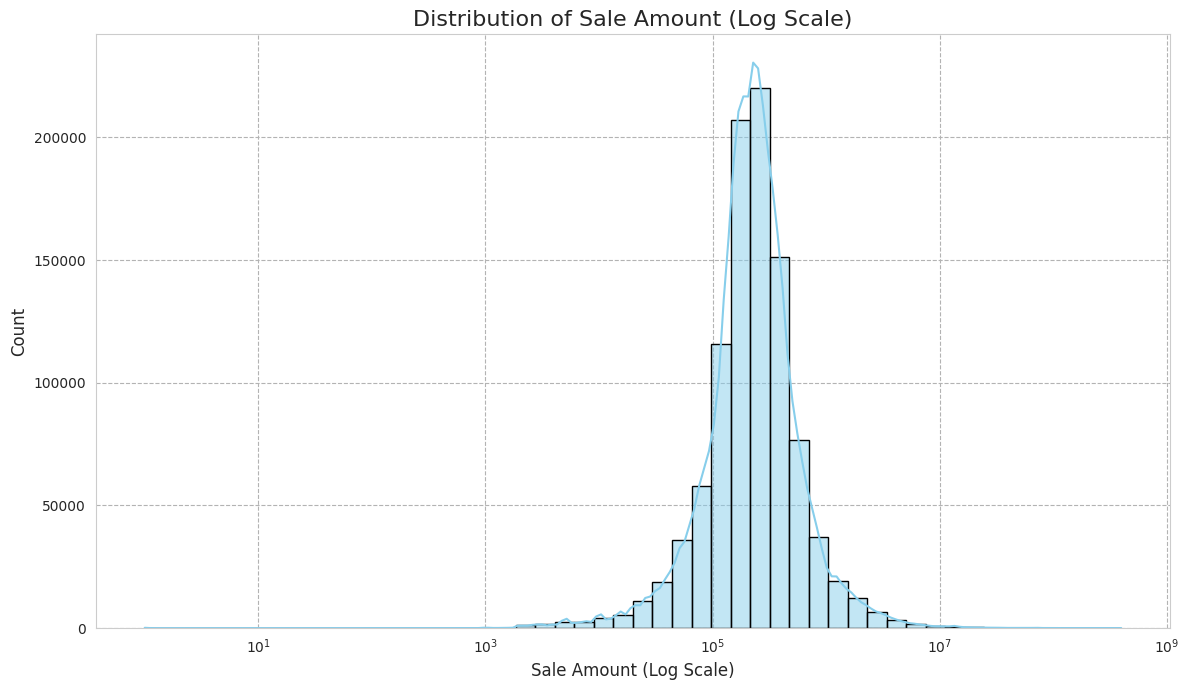


Observation: The histogram on a logarithmic scale reveals the true shape of the distribution.
It shows where the majority of sales are concentrated and the extent of the tail, even after cleaning extreme outliers.


In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np # Ensure numpy is imported for log

print("\n--- Visualizing the Distribution of 'Sale Amount' (Bell Curve) ---")
print("--- Using a Logarithmic Scale for X-axis for better visibility ---")

plt.figure(figsize=(12, 7))

# Create a histogram with a Kernel Density Estimate (KDE) plot
# Use log scale on the x-axis (Sale Amount)
sns.histplot(df['Sale Amount'], bins=50, kde=True, log_scale=True, color='skyblue', edgecolor='black')

plt.title('Distribution of Sale Amount (Log Scale)', fontsize=16)
plt.xlabel('Sale Amount (Log Scale)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(True, which="both", ls="--", c=".7") # Add grid for readability
plt.tight_layout()
plt.show()

print("\nObservation: The histogram on a logarithmic scale reveals the true shape of the distribution.")
print("It shows where the majority of sales are concentrated and the extent of the tail, even after cleaning extreme outliers.")

In [42]:
import pandas as pd
import numpy as np

print("--- Inspecting Rows with 'Sale Amount' <= 10,000 ---")

# Filter for rows where Sale Amount is less than or equal to 10,000
df_low_sale_amounts = df[df['Sale Amount'] <= 10000].copy()

print(f"Number of rows with 'Sale Amount' <= 10,000: {len(df_low_sale_amounts)}")

if not df_low_sale_amounts.empty:
    print("\nFirst 10 rows of 'Sale Amount' <= 10,000 for inspection (all columns):")
    display(df_low_sale_amounts.head(10))

    print("\nDescriptive statistics for 'Sale Amount' in this subset:")
    display(df_low_sale_amounts['Sale Amount'].describe())

    print("\nValue counts of 'OPM remarks' for 'Sale Amount' <= 10,000 (Top 20, including NaN):")
    display(df_low_sale_amounts['OPM remarks'].value_counts(dropna=False).head(20))

    print("\nValue counts of 'Property Type' for 'Sale Amount' <= 10,000:")
    display(df_low_sale_amounts['Property Type'].value_counts(dropna=False))

    print("\nValue counts of 'Residential Type' for 'Sale Amount' <= 10,000 (Top 10):")
    display(df_low_sale_amounts['Residential Type'].value_counts(dropna=False).head(10))


else:
    print("\nNo rows found with 'Sale Amount' <= 10,000 in the current DataFrame.")

--- Inspecting Rows with 'Sale Amount' <= 10,000 ---
Number of rows with 'Sale Amount' <= 10,000: 10188

First 10 rows of 'Sale Amount' <= 10,000 for inspection (all columns):


,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location,Sale_Amount_Bin_Equal_Width,Sale_Amount_Custom_Bins
102,200557,2020,2021-06-22,Groton,0 GOLD STAR HWY,7000.0,10000.0,0.700000,Vacant Land,NaN,NaN,NaN,NaN,NaN,"(-5000000.0, 500000000.0]","(-0.001, 28000.0]"
443,200244,2020,2021-04-15,Avon,239 OLD FARMS RD 13B,58590.0,4500.0,13.020000,Residential,Condo,08 - Part Interest,NaN,NaN,NaN,"(-5000000.0, 500000000.0]","(-0.001, 28000.0]"
563,201096,2020,2021-07-28,Bristol,FIFTH ST LOT 81,25200.0,10000.0,2.520000,Vacant Land,NaN,12 - Non Buildable Lot,ABUTTER SALE,NaN,NaN,"(-5000000.0, 500000000.0]","(-0.001, 28000.0]"
614,200570,2020,2021-06-16,Branford,252 LEETES ISLAND RD #13,7900.0,4000.0,1.975000,Residential,Single Family,25 - Other,MOBILE HOME ONLY/BOUGHT BACK BY OWNER OF PARK,NaN,NaN,"(-5000000.0, 500000000.0]","(-0.001, 28000.0]"
825,200055,2020,2020-11-19,Essex,HILLSIDE DR,5600.0,5000.0,1.120000,Vacant Land,NaN,12 - Non Buildable Lot,EXCESS LAND,NaN,NaN,"(-5000000.0, 500000000.0]","(-0.001, 28000.0]"
897,200535,2020,2021-06-15,Groton,301 BUDDINGTON RD LOT 37,32830.0,5000.0,6.566000,Residential,Single Family,02 - Love and Affection,PRIVATE SALE,NaN,NaN,"(-5000000.0, 500000000.0]","(-0.001, 28000.0]"
949,20852,2020,2021-06-08,Hartford,820 PROSPECT AVE,211718.0,9000.0,23.524200,Residential,Single Family,08 - Part Interest,NaN,NaN,POINT (-72.71566 41.77287),"(-5000000.0, 500000000.0]","(-0.001, 28000.0]"
1033,200043,2020,2020-10-21,East Haven,125 ESTELLE RD,101430.0,7108.0,14.269800,Residential,Single Family,08 - Part Interest,NaN,NaN,NaN,"(-5000000.0, 500000000.0]","(-0.001, 28000.0]"
1809,200706,2020,2021-04-20,Bristol,20 CEDAR ST,24220.0,10000.0,2.422000,Vacant Land,NaN,NaN,NaN,NaN,POINT (-72.93597 41.68527),"(-5000000.0, 500000000.0]","(-0.001, 28000.0]"
2033,200009,2020,2020-12-28,Bozrah,OLD SALEM RD,2110.0,4700.0,0.448936,Vacant Land,NaN,12 - Non Buildable Lot,NaN,NaN,NaN,"(-5000000.0, 500000000.0]","(-0.001, 28000.0]"



Descriptive statistics for 'Sale Amount' in this subset:


,Sale Amount
count,10188.000000
mean,6038.857079
std,2770.865865
min,1.000000
25%,3813.500000
50%,5668.000000
75%,8500.000000
max,10000.000000



Value counts of 'OPM remarks' for 'Sale Amount' <= 10,000 (Top 20, including NaN):


,count
OPM remarks,
NaN,10060
BELOW MARKET,27
RATIO,8
BELOW MARKET - RATIO,8
MOBILE HOME,6
ASSESSED AS UNBUILDABLE,3
NO MLS,3
DOCK,2
GOOD SALE PER MLS,2



Value counts of 'Property Type' for 'Sale Amount' <= 10,000:


,count
Property Type,
NaN,6988
Single Family,1900
Condo,552
Vacant Land,222
Residential,179
Three Family,179
Two Family,147
Four Family,14
Commercial,7



Value counts of 'Residential Type' for 'Sale Amount' <= 10,000 (Top 10):


,count
Residential Type,
NaN,7217
Single Family,2028
Condo,598
Three Family,181
Two Family,149
Four Family,15


In [43]:
import pandas as pd
import numpy as np

print("--- Re-inspecting Rows with 'Sale Amount' == 1.00 ---")

# Filter for rows where Sale Amount is exactly 1.0
df_one_dollar_sales_re_inspect = df[df['Sale Amount'] == 1.0].copy()

print(f"Number of rows with 'Sale Amount' == 1.0: {len(df_one_dollar_sales_re_inspect)}")

if not df_one_dollar_sales_re_inspect.empty:
    print("\nFirst 10 rows of 'Sale Amount' == 1.0 for inspection (all columns):")
    display(df_one_dollar_sales_re_inspect.head(10))

    print("\nValue counts of 'OPM remarks' for 'Sale Amount' == 1.0:")
    display(df_one_dollar_sales_re_inspect['OPM remarks'].value_counts(dropna=False))

    print("\nValue counts of 'Property Type' for 'Sale Amount' == 1.0:")
    display(df_one_dollar_sales_re_inspect['Property Type'].value_counts(dropna=False))

    print("\nValue counts of 'Residential Type' for 'Sale Amount' == 1.0:")
    display(df_one_dollar_sales_re_inspect['Residential Type'].value_counts(dropna=False))

else:
    print("\nNo rows found with 'Sale Amount' == 1.0 in the current DataFrame.")

--- Re-inspecting Rows with 'Sale Amount' == 1.00 ---
Number of rows with 'Sale Amount' == 1.0: 52

First 10 rows of 'Sale Amount' == 1.0 for inspection (all columns):


,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location,Sale_Amount_Bin_Equal_Width,Sale_Amount_Custom_Bins
131272,20181,2002,2002-11-12,Hartford,57 GILLETT ST,165060.0,1.0,165060.0,NaN,NaN,NaN,NaN,NaN,NaN,"(-5000000.0, 500000000.0]","(-0.001, 28000.0]"
194408,30270,2003,2003-12-30,Brooklyn,HARTFORD RD,490.0,1.0,490.0,NaN,NaN,28.0,NaN,NaN,NaN,"(-5000000.0, 500000000.0]","(-0.001, 28000.0]"
205751,31255,2003,2004-07-22,Bristol,66 EMMETT ST 12,9520.0,1.0,9520.0,NaN,NaN,3.0,NaN,NaN,POINT (-72.91363 41.66961),"(-5000000.0, 500000000.0]","(-0.001, 28000.0]"
214107,30106,2003,2004-03-19,Thompson,0 & 12 JOHNSON ST,83000.0,1.0,83000.0,NaN,NaN,29.0,NaN,NaN,NaN,"(-5000000.0, 500000000.0]","(-0.001, 28000.0]"
217932,30105,2003,2004-03-19,Thompson,0 & 12 JOHNSON ST,83000.0,1.0,83000.0,NaN,NaN,29.0,NaN,NaN,NaN,"(-5000000.0, 500000000.0]","(-0.001, 28000.0]"
229855,30246,2003,2004-05-24,Oxford,279 GOVERNORS HL RD,0.0,1.0,0.0,NaN,NaN,1.0,NaN,NaN,POINT (-73.14225 41.41308),"(-5000000.0, 500000000.0]","(-0.001, 28000.0]"
255749,30107,2003,2004-03-19,Thompson,0 & 12 JOHNSON ST,83000.0,1.0,83000.0,NaN,NaN,29.0,NaN,NaN,NaN,"(-5000000.0, 500000000.0]","(-0.001, 28000.0]"
304150,40089,2004,2004-10-29,Westport,33 MAYFLOWER PKY,594000.0,1.0,594000.0,NaN,NaN,1,NaN,NaN,NaN,"(-5000000.0, 500000000.0]","(-0.001, 28000.0]"
330252,50083,2005,2006-05-02,Bethany,15 JOHNSON RD,194680.0,1.0,194680.0,NaN,NaN,2,NaN,NaN,POINT (-73.0088 41.42401),"(-5000000.0, 500000000.0]","(-0.001, 28000.0]"
331998,50488,2005,2006-06-30,East Haven,102 RUSSO AVE,73980.0,1.0,73980.0,NaN,NaN,1,NaN,NaN,NaN,"(-5000000.0, 500000000.0]","(-0.001, 28000.0]"



Value counts of 'OPM remarks' for 'Sale Amount' == 1.0:


,count
OPM remarks,
NaN,52



Value counts of 'Property Type' for 'Sale Amount' == 1.0:


,count
Property Type,
NaN,44
Single Family,8



Value counts of 'Residential Type' for 'Sale Amount' == 1.0:


,count
Residential Type,
NaN,44
Single Family,8


In [54]:
import pandas as pd
import numpy as np

print("--- Creating 'Sale_Remarks_Category' Column based on OPM remarks (ULTIMATE FINAL UPDATE) ---")

# Ensure OPM remarks is treated as string for .str.contains()
df['OPM remarks'] = df['OPM remarks'].astype(str)

# Initialize a new column with a default category.
df['Sale_Remarks_Category'] = 'Other/Uncategorized'

# Define conditions and corresponding choices using numpy.select for clarity and order.
# The order is CRITICAL: more specific or problematic categories should come first.
conditions = [
    # 1. Absolute Top Priority for Stubborn Invalid/Error Sales Phrases
    # These exact phrases have been stubbornly staying in Other/Uncategorized
    df['OPM remarks'].str.contains(r'NOT A VALID SALE PER TOWN SITE|NOT VALID SALE PER TOWN RECORD|NOT VALID PER TOWN WEBSITE|NOT A VALID SALE PER TOWN SITE - ESTATE|DUPLICATE - ALSO SEE', case=False, na=False),

    # 2. Absolute Top Priority for Stubborn Distressed/Non-Arms-Length Phrases
    # These exact phrases for foreclosures have also been stubborn
    df['OPM remarks'].str.contains(r'PURCHASE OF A FORECLOSED PROPERTY|SALE OF A FORECLOSED PROPERTY|PURCHASE OF FORECLOSED PROPERTY|SALE OF FORECLOSED PROPERTY PER TOWN SITE|FORECLOSUE SALE PER TOWN SITE|SALE AFTER FORECLOSED PROPERTY PER JUDICIAL SITE|DISTRESSED SALE PER MLS|QUIT CLAIM PER TOWN SITE', case=False, na=False),

    # 3. General Invalid/Error Sales (broader keywords)
    df['OPM remarks'].str.contains(r'INVALID|INCORRECT SALE PRICE|NO SUCH ADDRESS|NO RECORD|NOT USABLE|ASSESSOR GAVE NO REASON FOR BEING NON-USABLE|ADDRESS NOT LISTED', case=False, na=False),

    # 4. Commercial Property
    df['OPM remarks'].str.contains(r'COMMERCIAL|GAS STATION|GAS MART|INDUSTRIAL|APARTMENT COMPLEX|GAS WITH CONVENIENCE|4 FAMILY ASSESSED AS APARTMENTS|4 FAMILY', case=False, na=False), # Added '4 FAMILY'

    # 5. General Distressed/Non-Arms-Length (broader keywords for distressed types)
    df['OPM remarks'].str.contains(r'SHORT SALE|FORECLOS|BANK OWNED|BANK SALE|REO|COMMITTEE DEED|QUIT CLAIM|ESTATE SALE|FAMILY SALE|ABUTTER|PRIVATE SALE|PART INTEREST|RELATED PARTY|PURCHASE BY BANK|POSSIBLE FORECLOSURE|EXECUTORS DEED|SOLD BACK TO PREVIOUS OWNER|FAMILY PER TOWN CARD|GRANTOR|GRANTEE SAME LAST NAME|PURCHASE FROM MORTGAGE COMPANY|SOLD BY TOWN|HABITAT FOR HUMANITY|TRUST', case=False, na=False), # Broadened FORECLOSUR to FORECLOS, added TRUST

    # 6. Below Market Flagged
    df['OPM remarks'].str.contains(r'BELOW MARKET|LOW SALE PRICE|SALE PRICE MUCH LOWER', case=False, na=False),

    # 7. New Construction
    df['OPM remarks'].str.contains(r'NEW CONSTRUCTION|UNDER CONSTRUCTION', case=False, na=False),

    # 8. Sold As Is
    df['OPM remarks'].str.contains(r'SOLD AS IS|PRICED TO SELL AS IS', case=False, na=False),

    # 9. Renovated/Updated Properties
    df['OPM remarks'].str.contains(r'RENOVAT|REMODEL|UPDATED|FINISHED BASEMENT|GUTTED|MANY UPDATES', case=False, na=False), # Added 'MANY UPDATES'

    # 10. Specific Property Feature/Condition
    df['OPM remarks'].str.contains(r'MOBILE HOME|TEAR DOWN|NEEDS WORK|REHAB|FIRE DAMAGE|UNBUILDABLE|LAKEFRONT|WATERFRONT|DOCKOMINIUM|CRUMBLING FOUNDATION|NEEDS MAJOR WORK|HOUSE IN EXTREME DISREPAIR|ASSESSED AS NON BUILDABLE|SOLD FULLY FURNISHED|BATHS|CENTRAL A/C|SEPTIC SYSTEM|ROOMING HOUSE|BUILDING DEMOLISHED|LAKE FRONT|HOUSE HAS SETTLED|OUTBUILDING|NEW ROOF|WATER DAMAGE', case=False, na=False), # Added DOCK, HOUSE HAS SETTLED, OUTBUILDING, NEW ROOF, WATER DAMAGE

    # 11. Special Transaction Type
    df['OPM remarks'].str.contains(r'NO MLS|RELOCATION|MULTIPLE PARCEL|MULTIPLE UNIT|PORTFOLIO SALE|BULK SALE|CO-OP|PURCHASE TO FLIP|SOLD TO ABUTTING PROPERTY OWNER|MULTIPLE PROPERTIES|SOLD TOGETHER WITH|EXPIRED LISTING|CASH SALE ONLY|CASH BUYERS|INCOME RESTRICTED|SOLD WITH TWO SEPARATE DEEDS|SOLD TO TENANT|SOLD TO BUILDER|COMBINED SALE|SUBDIVIDABLE LOT', case=False, na=False), # Added INCOME RESTRICTED, SOLD WITH TWO SEPARATE DEEDS, SOLD TO TENANT, SOLD TO BUILDER, COMBINED SALE, SUBDIVIDABLE LOT

    # 12. Assessment/Ratio Related
    df['OPM remarks'].str.contains(r'RATIO|ASSESSMENT INCREASE|ASSESSED VALUE|REDUCED ASSESSMNET|ASSD VALUE|ASSESSOR APPEAL|PA490|LESS THAN 70% ASSESSMENT|NO ASSESSMENT PROVIDED|ASSESS SAME AS SALE PRICE|ASSESSMENT ON TOWN SITE|REDUCED ASSESSMENT', case=False, na=False), # Added ASSESSMENT ON TOWN SITE, REDUCED ASSESSMENT

    # 13. Standard Sale
    df['OPM remarks'].str.contains(r'GOOD SALE|USABLE|VALID PER ASSESSORS REVIEW|VALID PER REVIEW OF ASSESSOR|VALID PER REVIEW', case=False, na=False),

    # 14. Handle NaN OPM remarks as 'Standard Sale' if they haven't been caught by other rules
    df['OPM remarks'] == 'nan'
]

choices = [
    'Invalid/Error Sale',
    'Invalid/Error Sale', # For explicit phrases from #1
    'Distressed/Non-Arms-Length', # For explicit phrases from #2
    'Invalid/Error Sale', # For general from #3
    'Commercial Property',
    'Distressed/Non-Arms-Length', # For general from #5
    'Below Market Flagged',
    'New Construction',
    'Sold As Is',
    'Renovated/Updated Property',
    'Specific Property Feature/Condition',
    'Special Transaction Type',
    'Assessment/Ratio Related',
    'Standard Sale',
    'Standard Sale' # For 'nan' OPM remarks
]

# Note: The 'choices' list needs to match the number of 'conditions'.
# Let's realign choices to conditions precisely.
# Re-evaluating the choice list to match the new condition structure.
# The original structure had 12 conditions and 12 choices.
# Now with explicit top priority conditions:
# Condition 1: Invalid (exact)
# Condition 2: Distressed (exact)
# Condition 3: Invalid (general)
# Condition 4: Commercial
# Condition 5: Distressed (general)
# Condition 6: Below Market
# Condition 7: New Construction
# Condition 8: Sold As Is
# Condition 9: Renovated
# Condition 10: Property Feature
# Condition 11: Special Transaction
# Condition 12: Assessment
# Condition 13: Standard
# Condition 14: NaN (Standard)

# Reconstructing choices based on the 14 conditions:
choices = [
    'Invalid/Error Sale',                  # Cond 1 (Invalid exact)
    'Distressed/Non-Arms-Length',          # Cond 2 (Distressed exact)
    'Invalid/Error Sale',                  # Cond 3 (Invalid general)
    'Commercial Property',                 # Cond 4
    'Distressed/Non-Arms-Length',          # Cond 5 (Distressed general)
    'Below Market Flagged',                # Cond 6
    'New Construction',                    # Cond 7
    'Sold As Is',                          # Cond 8
    'Renovated/Updated Property',          # Cond 9
    'Specific Property Feature/Condition', # Cond 10
    'Special Transaction Type',            # Cond 11
    'Assessment/Ratio Related',            # Cond 12
    'Standard Sale',                       # Cond 13
    'Standard Sale'                        # Cond 14 (NaNs)
]


# Apply the conditions to create the new column
df['Sale_Remarks_Category'] = np.select(conditions, choices, default='Other/Uncategorized')

print("\n--- Value Counts for New 'Sale_Remarks_Category' Column (ULTIMATE FINAL UPDATE) ---")
display(df['Sale_Remarks_Category'].value_counts())

print("\n--- First 5 rows with new 'Sale_Remarks_Category' ---")
display(df[['OPM remarks', 'Sale_Remarks_Category']].head())

print("\n'Sale_Remarks_Category' column has been updated. Please review the value counts, especially for 'Other/Uncategorized'.")

--- Creating 'Sale_Remarks_Category' Column based on OPM remarks (ULTIMATE FINAL UPDATE) ---

--- Value Counts for New 'Sale_Remarks_Category' Column (ULTIMATE FINAL UPDATE) ---


,count
Sale_Remarks_Category,
Standard Sale,986523
Renovated/Updated Property,3254
Other/Uncategorized,1503
Distressed/Non-Arms-Length,1493
Special Transaction Type,786
Specific Property Feature/Condition,479
New Construction,420
Below Market Flagged,350
Sold As Is,204



--- First 5 rows with new 'Sale_Remarks_Category' ---


,OPM remarks,Sale_Remarks_Category
0,nan,Standard Sale
1,nan,Standard Sale
2,nan,Standard Sale
3,nan,Standard Sale
4,nan,Standard Sale



'Sale_Remarks_Category' column has been updated. Please review the value counts, especially for 'Other/Uncategorized'.


In [56]:
import pandas as pd

# Assuming 'df' is loaded in your environment.
# If not, please load your DataFrame here (e.g., df = pd.read_csv('your_data.csv'))

print("--- Inspecting 'OPM remarks' within 'Other/Uncategorized' Category (ULTIMATE FINAL POST-UPDATE) ---")

# Filter the DataFrame for rows where 'Sale_Remarks_Category' is 'Other/Uncategorized'
df_other_uncategorized_remarks_ultimate_final_updated = df[df['Sale_Remarks_Category'] == 'Other/Uncategorized'].copy()

print(f"Number of rows in 'Other/Uncategorized' category: {len(df_other_uncategorized_remarks_ultimate_final_updated)}")

if not df_other_uncategorized_remarks_ultimate_final_updated.empty:
    # Get the value counts of the original 'OPM remarks' for this subset
    # We'll look at the top 50, but you can adjust this if there are many unique ones
    other_remarks_counts_ultimate_final_updated = df_other_uncategorized_remarks_ultimate_final_updated['OPM remarks'].value_counts(dropna=False)

    print("\nTop 50 'OPM remarks' found in the 'Other/Uncategorized' category (ULTIMATE FINAL POST-UPDATE):")
    # Using .to_string() for reliable display in this environment
    print(other_remarks_counts_ultimate_final_updated.head(50).to_string())

    if len(other_remarks_counts_ultimate_final_updated) > 50:
        print(f"\nThere are {len(other_remarks_counts_ultimate_final_updated) - 50} more unique remarks in this category.")

else:
    print("\nNo rows found in the 'Other/Uncategorized' category. This means all remarks were successfully categorized!")

print("\nObservation: Review these remarks carefully. Ideally, this list should be very small and contain truly unique/unclassifiable remarks.")

--- Inspecting 'OPM remarks' within 'Other/Uncategorized' Category (ULTIMATE FINAL POST-UPDATE) ---
Number of rows in 'Other/Uncategorized' category: 1503

Top 50 'OPM remarks' found in the 'Other/Uncategorized' category (ULTIMATE FINAL POST-UPDATE):
OPM remarks
SEE ASSESSOR REMARK                                                          5
FROM TOWN OF PUTNAM                                                          3
PER MLS CLOSED PRICE = $225,000                                              3
PER TOWN RECORD                                                              3
PER MLS CLOSING PRICE = $260,000                                             3
EXPIRED 2019 LISTING PER MLS                                                 3
LOW SALE FOR COMPLEX                                                         2
DUPLICATE ENTRY - ALSO SEE #200820                                           2
test                                                                         2
PER MLS SALE PRICE = $130,

In [57]:
import pandas as pd

# Display DataFrame information
print("--- DataFrame Info ---")
df.info()

print("\n--- DataFrame Columns ---")
print(df.columns.tolist())

print("\n--- First 5 Rows of DataFrame ---")
display(df.head())

--- DataFrame Info ---
<class 'pandas.core.frame.DataFrame'>
Index: 995402 entries, 0 to 997212
Data columns (total 17 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   Serial Number                995402 non-null  int64         
 1   List Year                    995402 non-null  int64         
 2   Date Recorded                995402 non-null  datetime64[ns]
 3   Town                         995402 non-null  object        
 4   Address                      995378 non-null  object        
 5   Assessed Value               995402 non-null  float64       
 6   Sale Amount                  995402 non-null  float64       
 7   Sales Ratio                  995402 non-null  float64       
 8   Property Type                614654 non-null  object        
 9   Residential Type             608792 non-null  object        
 10  Non Use Code                 287873 non-null  object        
 11  Assessor

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location,Sale_Amount_Bin_Equal_Width,Sale_Amount_Custom_Bins,Sale_Remarks_Category
0,2020177,2020,2021-04-14,Ansonia,323 BEAVER ST,133000.0,248400.0,0.5354,Residential,Single Family,NaN,NaN,nan,POINT (-73.06822 41.35014),"(-5000000.0, 500000000.0]","(225000.0, 253000.0]",Standard Sale
1,2020225,2020,2021-05-26,Ansonia,152 JACKSON ST,110500.0,239900.0,0.4606,Residential,Three Family,NaN,NaN,nan,NaN,"(-5000000.0, 500000000.0]","(225000.0, 253000.0]",Standard Sale
2,2020348,2020,2021-09-13,Ansonia,230 WAKELEE AVE,150500.0,325000.0,0.4630,Commercial,NaN,NaN,NaN,nan,NaN,"(-5000000.0, 500000000.0]","(309000.0, 337000.0]",Standard Sale
3,2020090,2020,2020-12-14,Ansonia,57 PLATT ST,127400.0,202500.0,0.6291,Residential,Two Family,NaN,NaN,nan,NaN,"(-5000000.0, 500000000.0]","(191000.0, 208000.0]",Standard Sale
4,200500,2020,2021-09-07,Avon,245 NEW ROAD,217640.0,400000.0,0.5441,Residential,Single Family,NaN,NaN,nan,NaN,"(-5000000.0, 500000000.0]","(365000.0, 1000292000.0]",Standard Sale
